# Customer Lifetime Value Prediction
### for Implementation in Automotive Insurance Marketing

by Amira Afdhal

for Purwadhika JCDS2704


# Business Problem

#### Introduction
Customer Lifetime Value (CLV) is a critical metric for automotive insurance companies, representing the total revenue a company expects to earn from a customer over their relationship. Predicting CLV helps insurers optimize pricing strategies, personalize marketing efforts, and improve customer retention. By leveraging machine learning models, we aim to enhance CLV prediction accuracy, enabling data-driven decision-making.

#### Stakeholders
Marketing Team at the Automotive Insurance Company: Uses CLV predictions to tailor campaigns and customer engagement strategies.

#### Problem Statements
- Can we predict Customer Lifetime Value of our existing policyholders?
- What characteristics of our policyholders influence their Customer Lifetime Value?
- How can we target our policy offers more efficiently to our policyholders?

#### CLV Formula
In the context of an **automotive insurance company**, **CLV** can be estimated as:

$$
\text{CLV} = (\text{Average Annual Premium} \times \text{Policy Duration}) - \text{Total Expected Claims Cost}
$$

Where:  
- **Average Annual Premium:** The amount a customer pays per year for their auto insurance policy.  
- **Policy Duration:** The average number of years a customer stays with the insurance company.  
- **Total Expected Claims Cost:** The estimated total amount the company expects to pay in claims for that customer.

#### Lack of Policy Duration Data
Since our dataset does not have any columns indicating the duration of a policy for a policyholder, predicting CLV will also effectively predict the policy duration of a policy held by a policyholder.

# Data Understanding

| Column Name               | Description |
|---------------------------|-------------|
| Vehicle Class            | Category of the vehicle (e.g., Four-Door Car, Two-Door Car, SUV). |
| Coverage                 | Type of insurance coverage (e.g., Basic, Extended, Premium). |
| Renew Offer Type         | Type of renewal offer given to the customer (e.g., Offer 1, Offer 2). |
| EmploymentStatus         | Employment status of the customer (e.g., Employed, Unemployed, Retired). |
| Marital Status          | Marital status of the customer (e.g., Single, Married, Divorced). |
| Education               | Highest level of education attained by the customer (e.g., High School or Below, Bachelor, Master). |
| Number of Policies      | Total number of policies the customer holds. |
| Monthly Premium Auto    | Amount the customer pays per month for auto insurance. |
| Total Claim Amount      | The total amount claimed by the customer. |
| Income                 | Customer’s annual income in USD |
| Customer Lifetime Value | Total revenue the customer will generate over their lifetime. |

## Load Dataset & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#splitting tuning model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold

#imputer

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

#encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce

from statsmodels.stats.outliers_influence import variance_inflation_factor

#feature_selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif,SelectFromModel, RFE, SequentialFeatureSelector

#preprocessing
from sklearn.compose import ColumnTransformer

#model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#pipeline
from sklearn.pipeline import Pipeline

#metric
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("data_customer_lifetime_value.csv")

## Data Cleansing

Data cleansing summary:
- **Check for missing values and duplicates:** 618 duplicate rows were dropped, no missing values were found
- **Show descriptive statistics**
- **Change datatypes** of some columns to correct datatypes were appropriate, the categorical columns were all changed to the 'category' dataype and `Number of Policies` was changed to 'int64' since it only takes integer values
- **Check unique values**
- **Check for normality (numerical columns):**  Using the Normal test for normality, we see that none of the columns in our dataset are normally distributed.
- **Check 0 values are true 0:**
   We see that the minimum value for `Income` is 0, and we want to make sure this is a true 0 value and not a missing value. It turns out all of the rows with `Income==0` have `EmploymentStatus=='Unemployed'` so we know that the income is truely 0 and is not a missing value.

In [3]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [5]:
# check for duplicates
print(f"Number of duplicated rows:{df.duplicated().sum()}")

# drop duplicates
df = df.drop_duplicates()

print(f"Number of rows after duplicates are dropped: {len(df)}")

Number of duplicated rows:618
Number of rows after duplicates are dropped: 5051


In [6]:
# check for missing values
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [7]:
# show descriptive statistics
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5051,5051,5051,5051,5051,5051
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3100,2019,3187,2986,1529


In [8]:
# check unique values for each column
for i in df.columns:
    print(i)
    print(df[i].unique())

Vehicle Class
['Four-Door Car' 'Two-Door Car' 'SUV' 'Sports Car' 'Luxury SUV'
 'Luxury Car']
Coverage
['Extended' 'Basic' 'Premium']
Renew Offer Type
['Offer1' 'Offer3' 'Offer2' 'Offer4']
EmploymentStatus
['Retired' 'Employed' 'Disabled' 'Medical Leave' 'Unemployed']
Marital Status
['Divorced' 'Married' 'Single']
Education
['High School or Below' 'College' 'Master' 'Bachelor' 'Doctor']
Number of Policies
[2. 6. 1. 8. 5. 3. 7. 4. 9.]
Monthly Premium Auto
[ 90.  62. 116. 107. 101.  66.  65. 117.  78.  63.  70.  71.  61.  64.
 129. 100.  68. 126.  95. 128.  84. 125.  98.  97. 121. 192.  69.  83.
  72.  67. 103.  74.  89.  86. 110. 124.  73. 191. 122. 133. 165. 127.
 144. 114. 194. 118. 111. 138. 119.  76.  80. 154. 189. 130. 109. 161.
  88.  93. 113.  87. 136. 106.  99. 105.  82.  96. 159. 181. 146. 115.
 187. 108. 209. 102. 104.  77.  79. 283. 150.  92.  91. 180. 131. 112.
 184. 137. 185.  94. 198. 135. 140. 132. 139.  85. 123. 214. 201. 155.
 193.  81. 223. 188. 134. 153. 147. 202. 196.

In [9]:
# Change to appropriate datatypes

#categories
df['Vehicle Class'] = df['Vehicle Class'].astype('category') 
df['Coverage'] = df['Coverage'].astype('category')
df['Renew Offer Type'] = df['Renew Offer Type'].astype('category')
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Education'] = df['Education'].astype('category')

#int
df['Number of Policies'] = df['Number of Policies'].astype('int64')


In [10]:
# Check for normal distribution in the numerical columns

numerical_cols = ['Number of Policies', 'Monthly Premium Auto', 
                  'Total Claim Amount', 'Income', 'Customer Lifetime Value']

# Loop through numerical columns
for col in numerical_cols:
    print(f"Normal Test for {col}:")
    statistic, p_value = stats.normaltest(df[col])
    print(f"Statistic={statistic:.4f}, p-value={p_value:.4f}")

    if p_value > 0.05:
        print("Conclusion: Data is normally distributed")
    else:
        print("Conclusion: Data is NOT normally distributed ")
    
    print("-" * 50)

Normal Test for Number of Policies:
Statistic=821.5936, p-value=0.0000
Conclusion: Data is NOT normally distributed 
--------------------------------------------------
Normal Test for Monthly Premium Auto:
Statistic=2153.3049, p-value=0.0000
Conclusion: Data is NOT normally distributed 
--------------------------------------------------
Normal Test for Total Claim Amount:
Statistic=1842.3815, p-value=0.0000
Conclusion: Data is NOT normally distributed 
--------------------------------------------------
Normal Test for Income:
Statistic=2343.4383, p-value=0.0000
Conclusion: Data is NOT normally distributed 
--------------------------------------------------
Normal Test for Customer Lifetime Value:
Statistic=3456.6803, p-value=0.0000
Conclusion: Data is NOT normally distributed 
--------------------------------------------------


In [11]:
# check for true 0 values
df[df["Income"]==0]['EmploymentStatus'].unique()

['Unemployed']
Categories (5, object): ['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed']

## EDA

#### Distribution of Target Variable

<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

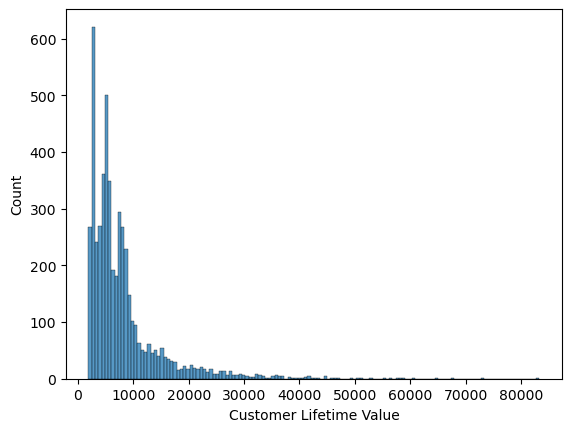

In [12]:
sns.histplot(df['Customer Lifetime Value'])

In [13]:
# make a copy of clean dataframe for modelling
df_eda = df.copy()

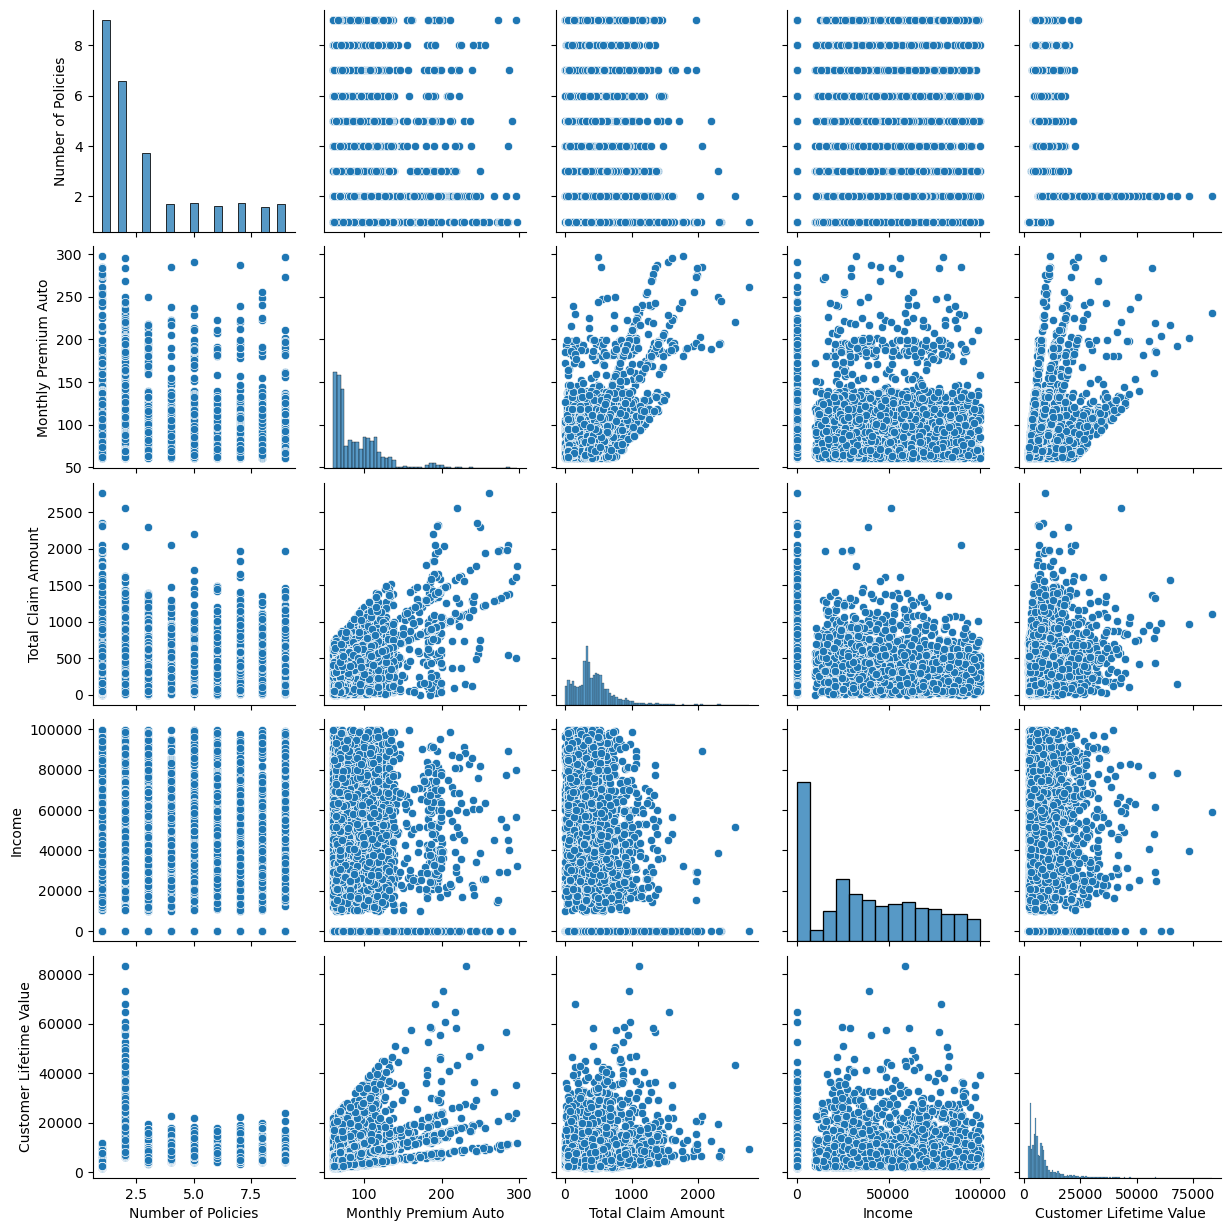

In [14]:
sns.pairplot(df)

In [15]:
# proportion of 0 income
round(100*(len(df_eda[df_eda["Income"]==0])/len(df)),2)

26.37

#### Boxplot of Categorical Variables vs Target

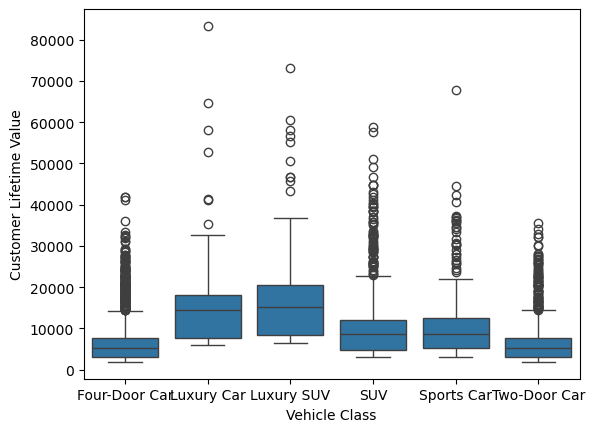

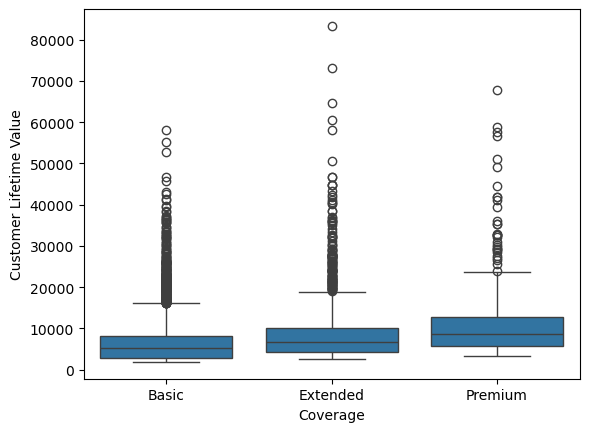

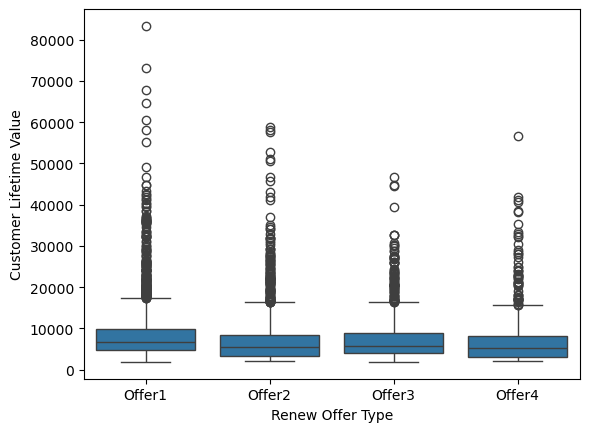

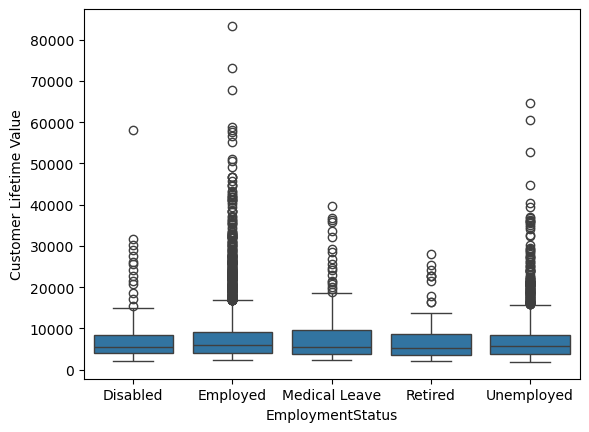

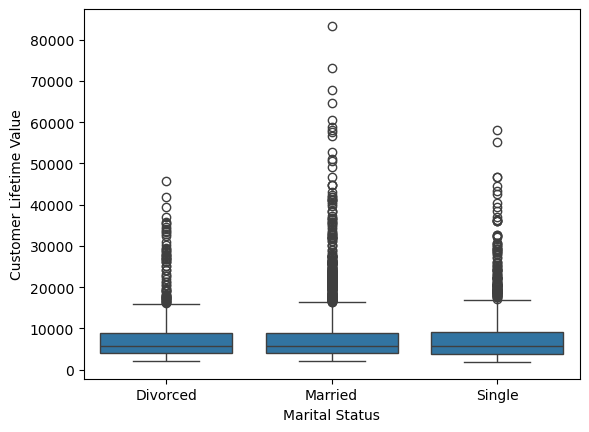

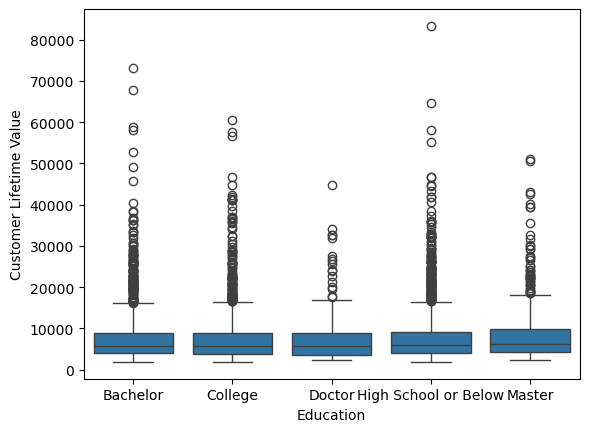

In [16]:
for i in df.select_dtypes(include='category').columns:
    sns.boxplot(df, x=i, y='Customer Lifetime Value')
    plt.show()

In [17]:
df_unemployed = df_eda[df_eda['EmploymentStatus']=='Unemployed']

In [18]:
df_unemployed

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1,66.0,475.200000,0.0,2239.647297
...,...,...,...,...,...,...,...,...,...,...,...
5651,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1,129.0,1486.410662,0.0,4502.867562
5652,Four-Door Car,Extended,Offer4,Unemployed,Married,Bachelor,5,95.0,456.000000,0.0,6661.744145
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9,67.0,132.443705,0.0,4927.707574
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,College,7,72.0,391.636628,0.0,4936.888359


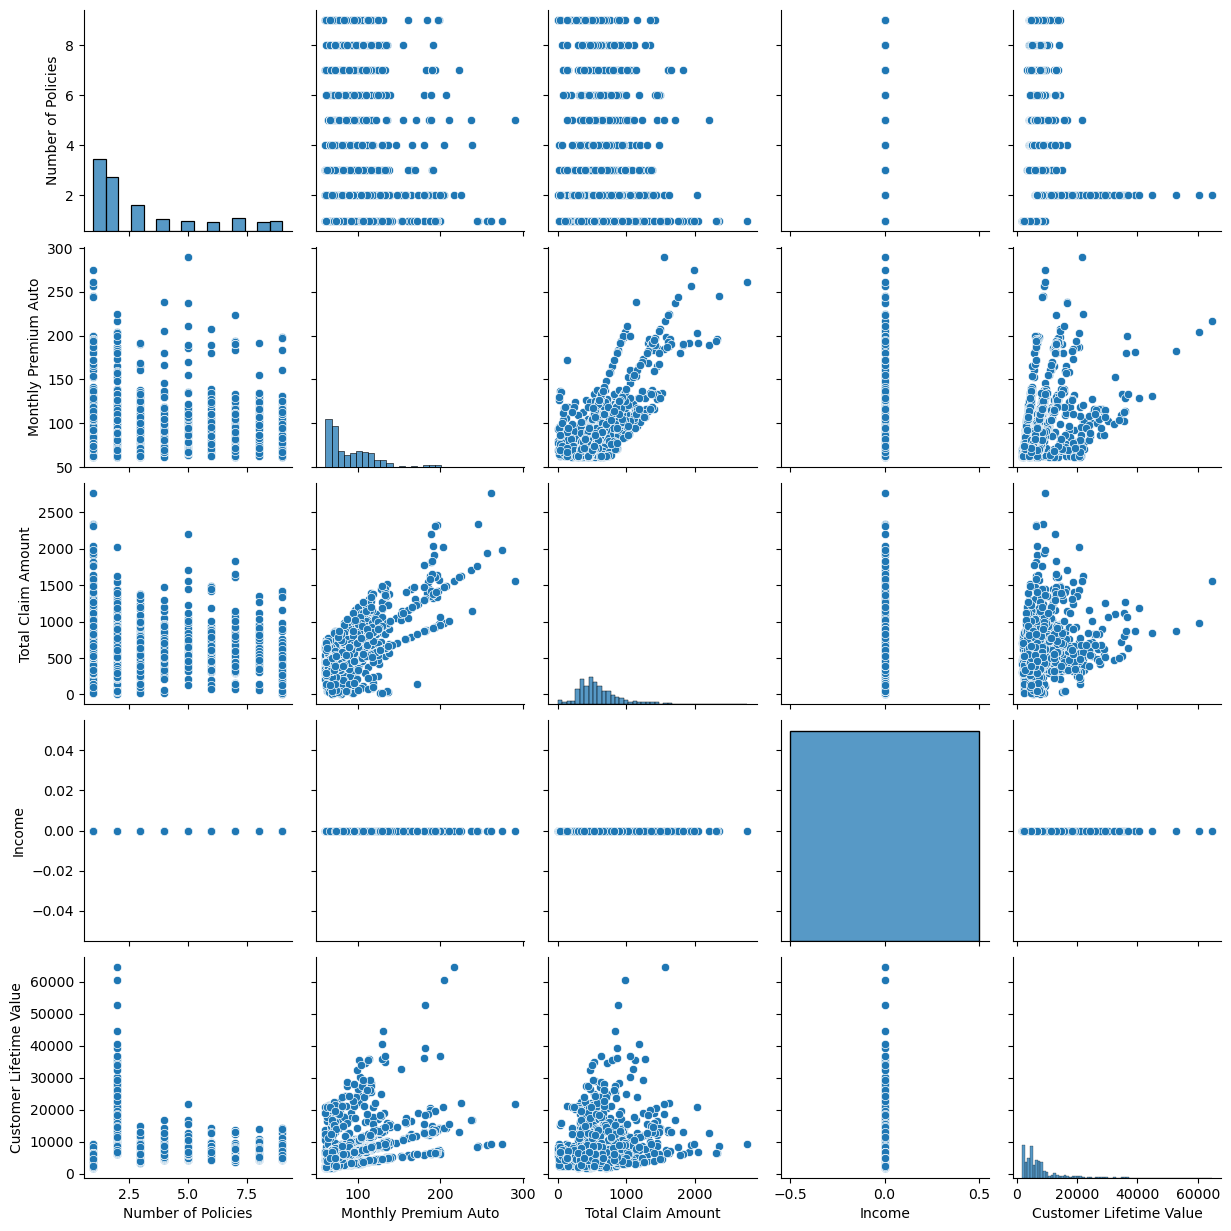

In [19]:
# the distribution of Unemployed customers is similar to the rest of the dataset in all other columns
sns.pairplot(df[df['EmploymentStatus']=='Unemployed'])

<Axes: xlabel='Monthly Premium Auto', ylabel='Customer Lifetime Value'>

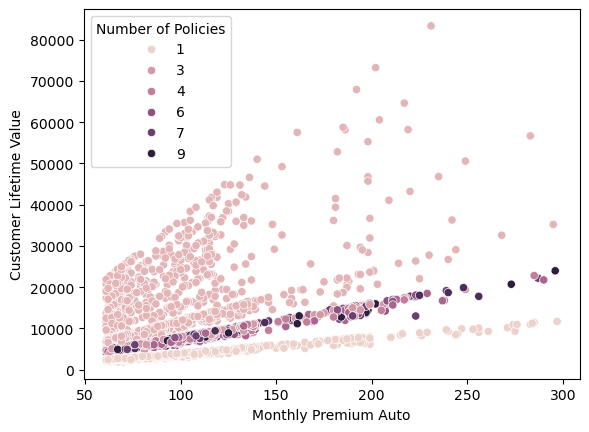

In [20]:
sns.scatterplot(df_eda, x="Monthly Premium Auto", y="Customer Lifetime Value", hue="Number of Policies")

In [21]:
# how many months?

df_eda['policy_length'] = round((df_eda["Customer Lifetime Value"]-df_eda['Total Claim Amount'])/(df_eda['Monthly Premium Auto']*df_eda['Number of Policies']))

<Axes: xlabel='policy_length', ylabel='Count'>

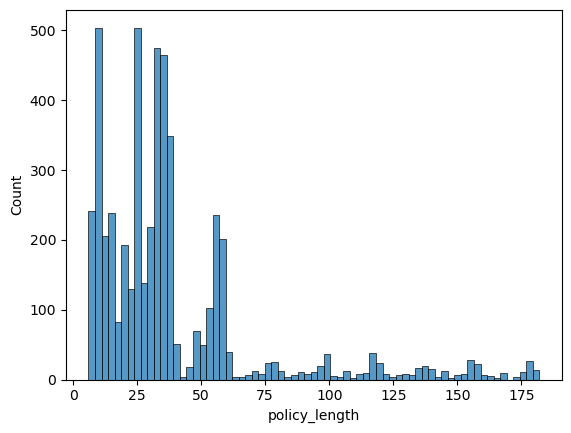

In [22]:
sns.histplot(df_eda['policy_length'])

<Axes: xlabel='Monthly Premium Auto', ylabel='Customer Lifetime Value'>

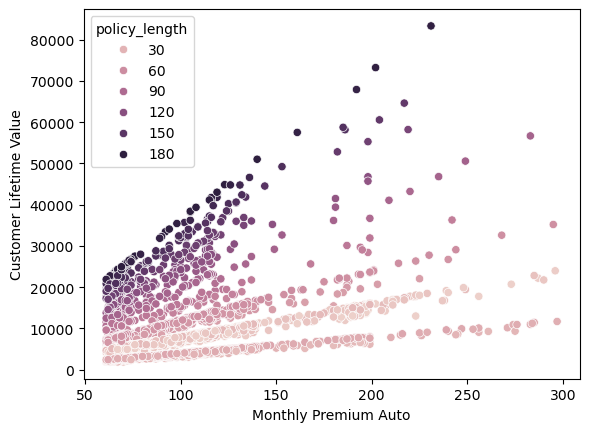

In [23]:
sns.scatterplot(df_eda, x="Monthly Premium Auto", y="Customer Lifetime Value", hue="policy_length")

#### Multicolinearity


In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(X_train.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

NameError: name 'X_train' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
def vif_calc(X):
    vif = pd.DataFrame()
    vif['feature'] = X.select_dtypes(include='number').columns
    vif['VIF'] = [variance_inflation_factor(X.select_dtypes(include='number'), kolom) for kolom in range(len(X.select_dtypes(include='number').columns))]
    
    return vif

In [ ]:
vif_calc(X.select_dtypes(include='number'))

## Empirical Analysis - PCA & K-means Clustering

In [ ]:
df_cluster = df.copy()

# Select relevant numerical features for clustering (including CLV)
features = ['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Number of Policies']
df_selected = df_cluster[features].dropna()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Apply PCA for dimensionality reduction (2 components for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_pca)

# Add cluster labels to original data
df_selected['Cluster'] = clusters

# Scatter Plot of PCA Results with Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_selected['Cluster'], palette="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments Based on CLV (PCA + K-Means)")
plt.legend()
plt.show()

# Print PCA explained variance ratio
print(f"Explained Variance by PCA Components: {pca.explained_variance_ratio_}")

# Analyze cluster characteristics
display(pd.DataFrame(df_selected.groupby('Cluster').median()))


In [ ]:
# Import required libraries
from sklearn.cluster import KMeans

# Define range of clusters to test
wcss = []
K_range = range(1, 11)  # Testing 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)  # Store within-cluster sum of squares

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid()
plt.show()


### **Cluster Characteristics Analysis**

- **Cluster 0 (Low CLV, Low Income, Moderate Claims & Premiums)**

Customers in this cluster have **low lifetime value** and **very low income**, yet they still pay a moderate monthly premium and file moderate claims. They might be budget-conscious customers who maintain essential coverage.


- **Cluster 1 (High CLV, High Premium, High Claims, Mid-High Income)**

This cluster represents **high-value customers** who pay higher premiums and have **higher claim amounts**. They have **mid-high income** and likely **purchase more comprehensive insurance plans**.

- **Cluster 2 (Mid CLV, Low Premium, Low Claims, Very High Income)**

These are **wealthier customers** who **pay lower premiums** and **file fewer claims**. They might have **better risk management** or **prefer minimal insurance coverage**, leading to a moderate CLV.




# Modelling

## Finding a Benchmark Model

In [ ]:
# make a copy of clean dataframe for modelling
df_model = df.copy()

#### Data Splitting

In [ ]:
# Define target and features
X = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

In [ ]:
# Split data into training and test sets 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

#### Benchmark Model Selection using Cross Validation

Since this experiment is only to find a good benchmark model,
- **Robust Scaler** is used since data is skewed and not normally distributed
- **One Hot Encoder** is used for all the categorical variables for simplicity

In [ ]:
# Encoding Categorical features

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education']),
], remainder='passthrough')

In [ ]:
# Define models to be tested
lr = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Scaling data
scaler = RobustScaler()

# Models list
models = [lr, ridge, lasso, dt, rf, xgb]

score_r2 = []
mean_r2 = []
std_r2 = []

score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

# Finding the best models using 3 different metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
   # R2
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    
    score_r2.append(model_cv_r2)
    mean_r2.append(model_cv_r2.mean())
    std_r2.append(model_cv_r2.std())
    
    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    # print(model_cv_rmse, i)

    score_rmse.append(abs(model_cv_rmse))
    mean_rmse.append(abs(model_cv_rmse.mean()))
    std_rmse.append(abs(model_cv_rmse.std()))

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    # print(model_cv_mae, i)

    score_mae.append(abs(model_cv_mae))
    mean_mae.append(abs(model_cv_mae.mean()))
    std_mae.append(abs(model_cv_mae.std()))

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    # print(model_cv_mape, i)

    score_mape.append(abs(model_cv_mape))
    mean_mape.append(abs(model_cv_mape.mean()))
    std_mape.append(abs(model_cv_mape.std()))

In [ ]:
# Results from the trials using 6 different models
pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regressor', 'Lasso Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_R2': mean_r2,
    'Std_R2': std_r2,
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
})

#### Benchmark Model Selection (Predict to Test Set)

- R² score (coefficient of determination): measures how well a regression model explains the variance in the target variable, with values closer to 1 indicating a better fit
- RMSE (Root Mean Squared Error): Penalizes large errors more due to squaring
- MAE (Mean Absolute Error): Measures the average absolute difference, treating all errors equally
- MAPE (Mean Absolute Percentage Error): Measures percentage-based error, making it scale-independent

Here we take the 2 best performing models based on **RMSE**, XGBoost and RandomForest, since we do not want our model to predict to have extreme predictions, and predicting them on the test set.

The best performing benchmark model will continue to hyperparameter tuning and these results will be the **model results before tuning** to make comparisons.

In [ ]:
# Benchmark models (top 2)
models = {
    'XGB': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Predicting on the test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R Squared': score_r2, 'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

We can see that RandomForest outperforms XGBoost as a benchmark model on all metrics, hence we will go forward into hyperparameter tuning for RandomForest for our final model.

## Hyperparameter Tuning with Random Forest

In [ ]:
# make a copy of clean dataframe for modelling
df_model = df.copy()

X = df_model.drop(columns='Customer Lifetime Value')
y = df_model['Customer Lifetime Value']


# split data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Preprocessing
+ **One Hot Encoder:** Since the number of unique values in each of the categorical columns are 6 or less, it is reasonable to use One-Hot encoding for all the categorical columns for ease of interpretability.
+ **Ordinal Encoder:** From our EDA, we see that the column `Coverage` has a hierarchy with regards to CLV, with "Basic", "Extended", and "Premium" having increasing mean CLV
+ **Robust Scaler:** the dataset has outliers which was not taken out because they are still possible, so a scaler which is robust to outliers is required, hence we have chosen the robust scaler

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 1', Pipeline([
            ('scaler', RobustScaler())
        ]), ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']),

        ('Categorical 1', Pipeline([
            ('encoder', OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']]))
        ]), ['Coverage']), 

        ('Categorical 2', Pipeline([
            ('encoder', OneHotEncoder())
        ]), ['Vehicle Class', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education'])
    ]
)

#### Random Forest Tuning
We want to optimize our **Random Forest Regressor** using **GridSearchCV**.

| **Hyperparameter**         | **Values Tested**       | **Explanation** |
|----------------------------|------------------------|----------------|
| **`n_estimators`**         | `[100, 200, 300]`      | Controls the number of decision trees in the forest. More trees generally improve performance but increase computational cost. A range of 100–300 balances accuracy and efficiency. |
| **`max_depth`**            | `[None, 10]`          | Limits tree depth to prevent overfitting. `None` allows full growth, while `10` restricts depth to prevent over-complex models. |
| **`min_samples_split`**    | `[5, 10]`             | The minimum number of samples needed to split a node. Higher values reduce overfitting by requiring more data for splits. |
| **`min_samples_leaf`**     | `[2, 5]`              | The minimum number of samples per leaf. Higher values help smooth predictions and reduce variance. |
| **`max_features`**         | `['sqrt', 7]`         | Controls the number of features considered per split. `'sqrt'` is standard for Random Forest, while `7` is ceil(p/3) which is normally used for regression (where p is the number of predictor variables) |
| **`max_samples`**          | `[None, 1000]`        | Specifies the number of samples used for bootstrapping. `None` means using all available data, while `1000` tests a sub-sampling approach to reduce computation. |


In [ ]:
# Parameter Grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of trees
    'regressor__max_depth': [None, 10],  # Depth of trees
    'regressor__min_samples_split': [5, 10],  # Minimum samples required to split
    'regressor__min_samples_leaf': [2, 5],  # Minimum samples in a leaf
    'regressor__max_features': ['sqrt', 7],  # Number of features per split
    'regressor__max_samples': [None, 1000] # Max samples while bootstrapping
}

In [ ]:
# Benchmark model with hyperparameter tuning
rf = RandomForestRegressor(random_state=42, verbose=0)

# Pipeline
estimator_rf = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectFromModel(rf, threshold="median")),
        ('regressor', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
gridsearch_rf = GridSearchCV(
    estimator_rf, 
    param_grid,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
)

In [ ]:
# Fit to train data to find best parameters
gridsearch_rf.fit(X_train, y_train)

#### Tuning Results and Best Parameters

The best hyperparameters were found using **GridSearchCV**, optimizing for model performance.

| **Metric**        | **Value** |
|-------------------|----------|
| **Best Score RMSE**    | `3939.08` |


| **Hyperparameter**         | **Best Value** |
|----------------------------|--------------|
| **`max_depth`**            | `None`       |
| **`max_features`**         | `7`          |
| **`max_samples`**          | `None`       |
| **`min_samples_leaf`**     | `5`          |
| **`min_samples_split`**    | `5`          |
| **`n_estimators`**         | `100`        |


In [ ]:
# Tuning results
pd.DataFrame(gridsearch_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

In [ ]:
# Best Parameters
print('RandomForestRegressor')
print('Best_score RMSE:', gridsearch_rf.best_score_)
print('Best_params:', gridsearch_rf.best_params_)

#### Predict to Test Set with the Tuned Model

In [ ]:
model = {'RandomForest': RandomForestRegressor(random_state=42)}

# Define model with best estimator
rf_tuning = gridsearch_rf.best_estimator_

# Fit model
rf_tuning.fit(X_train, y_train)

# Predict to test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Metrics results of final model
r2_rf_tuning = r2_score(y_test, y_pred_rf_tuning)
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'R Squared': r2_rf_tuning, 'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

**Performance Comparison**

In [ ]:
# Before Hyperparameter Tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

In [ ]:
# After Hyperparameter Tuning
score_after_tuning

## Model Evaluation and Insights

#### Analysis of Residuals


- **Skewed Distribution:** The histogram shows a peak around zero, but there are some extreme positive residuals (right tail). This suggests the model **tends to underpredict** CLV for some customers.  
- **Non-Normality:** The presence of a long right tail suggests potential **outliers** or **heteroscedasticity** (variance not constant across predictions).
- **Random Scatter:** Ideally, points should be randomly dispersed around **zero** (no pattern). Here, many residuals cluster around zero, which is good. However, for **higher predicted CLV values, residuals increase**, suggesting **higher variance** in errors (possible heteroscedasticity)

Overall, this results in:
- **Bias for High CLV Predictions:** The model appears to **struggle predicting high CLV values**, as residuals tend to be larger. We can see a threshold around ~9000 USD where the model starts to make larger errors.

In [ ]:
residuals = y_test - y_pred_rf_tuning  # Calculate residuals

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="royalblue")
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.legend()
plt.show()

# Residuals vs. Predictions Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color="purple")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.axvline(x=9000, color='blue', linestyle='--')
plt.xlabel("Predicted CLV")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted CLV")
plt.legend()
plt.show()

#### Random Forest Feature Importances

In [ ]:
# Extract the SelectKBest step
select_k_best = rf_tuning.named_steps['feature_selection']

# Extract the column transformer step
column_transformer = rf_tuning.named_steps['preprocessor']

# Get the feature names after one-hot encoding
num1_feature_names= column_transformer.named_transformers_['Numerical 1'].get_feature_names_out(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income'])
ord_feature_names= column_transformer.named_transformers_['Categorical 1'].get_feature_names_out(['Coverage'])

ohe_feature_names= column_transformer.named_transformers_['Categorical 2'].get_feature_names_out(['Vehicle Class', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education'])

feat_cols=list(num1_feature_names)+list(ord_feature_names)+list(ohe_feature_names)

In [ ]:
# Get feature importance from the best model
best_model = rf_tuning.named_steps['regressor']


feature_names = rf_tuning.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]


model_coef1 = pd.Series(best_model.feature_importances_, selected_feature_names).sort_values(ascending = False)
plt.figure(figsize=(12,6))
model_coef1.iloc[:50].plot(kind='bar', title='Feature Importances')
plt.show()

- Number of Policies and Monthly Premium Auto has the greatest feature importance
- Demographic data does not score highly in feature importance compared to policy features

#### SHAP Values

In [ ]:
import shap

# Apply preprocessing to the training data
X_train_preprocessed = rf_tuning.named_steps['preprocessor'].transform(X_train)

# Apply feature selection to the preprocessed data
X_train_selected = rf_tuning.named_steps['feature_selection'].transform(X_train_preprocessed)

# Get the feature names after selection
feature_names = rf_tuning.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]

# Get feature importance from the best model
best_model = rf_tuning.named_steps['regressor']


# Generate SHAP values
explainer = shap.Explainer(best_model, X_train_selected,feature_perturbation="interventional")
shap_values = explainer(X_train_selected, check_additivity=False)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_selected, feature_names=selected_feature_names)

- Number of Policies and Monthly Premium Auto has the greatest impact on model output
- A high CLV is very strongly correlated to ‘Number of Policies’ == 2 

In [ ]:
sns.scatterplot(df, x='Number of Policies', y='Customer Lifetime Value')

# Conclusions and Recommendations

#### Conclusions

After tuning the **Random Forest** model, the performance has improved:  

1. **Higher R-Squared (R²)**: The value increased from 0.654 to 0.679, indicating that the model now explains more variance in the data.  
2. **Lower RMSE**: The Root Mean Squared Error decreased from 4057.41 to 3905.83, suggesting improved prediction error.  
3. **Lower MAE and MAPE**: Both Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) have slightly improved, showing better overall error reduction.  

Overall, hyperparameter tuning has led to a more reliable model, improving both variance explanation and prediction error.

#### Recommendations for Modelling
- **Increase Number of Features:** Specifically get features regarding **policy duration** and other **policy features**, since feature importance shows it having the greatest influence on CLV.
- **Regression per Cluster:** Since we have already done clustering, CLV prediction might improve if prediction is done on each of the clusters instead of the whole dataset, as it might mitigate the effect of the large error values of the high CLV values and make the smaller CLV predictions have a smaller error.
- **Check for Outliers:** Large positive residuals might be **outliers affecting model performance**.  
- **Try Log Transformation:** If CLV has a skewed distribution, taking **log(CLV)** might stabilize variance.  

#### Recommendations Based on Customer Cluster
- **Cluster 0:** could benefit from **discounts or budget-friendly options** to retain customers with lower income.  
- **Cluster 1:** is the **most valuable segment**—consider offering **loyalty programs** or **premium policy upgrades**.  
- **Cluster 2:** has **high income but low CLV**—target them with **upgraded insurance products** to increase their CLV.

## Save Model

In [ ]:
# import pickle

# rf_tuning.fit(X,y) # FINAL MODEL
# filename = 'clv_final_model.sav'
# pickle.dump(rf_tuning,open(filename,'wb'))

## Model Limitations

In [ ]:
def generate_numerical_summary(df):
    numerical_summary = df.select_dtypes(include=['int64', 'float64']).agg(['min', 'max']).T
    return numerical_summary

def generate_categorical_summary(df):
    """Generate summary for categorical columns (All unique values in one row)."""
    categorical_summary = {col: [", ".join(map(str, df[col].dropna().unique()))] for col in df.select_dtypes(include=['category'])}
    categorical_summary = pd.DataFrame(categorical_summary).rename(columns={'0': 'Unique Values'})
    return (categorical_summary)

numerical_summary = generate_numerical_summary(df)
categorical_summary = generate_categorical_summary(df)

# Display the tables
display(numerical_summary)
display(categorical_summary.T)